<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear </h1>
modelo de aprendizado supervisionado

# Análises preliminares (aula 01)

In [ ]:
import matplotlib.pyplot as plt### Importando bibliotecas https://matplotlib.org/https://pandas.pydata.org/ http://www.numpy.org/ 
%matplotlib inline

import pandas as pd
import numpy as np

In [ ]:
import warnings ## Bibliotecas opcionais: https://docs.python.org/3/library/warnings.html

warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

In [ ]:
dados = pd.read_csv('cerveja_tratado.csv', sep = ';')# Leitura dos dados (o arquivo está zoado demais) 
dados[:3]

,data,t_media,t_minima,t_maxima,precipitacao,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0.0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0.0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1.0,30.814


In [ ]:
dados.columns = ['data','temp_media','temp_min','temp_max','chuva','fds','consumo']

In [ ]:
dados.shape  #Verificando o tamanho do dataset

(365, 7)

Análises Preliminares

In [ ]:
dados.describe().round(2) # Estatísticas descritivas

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25.40
std,3.18,2.83,4.32,12.42,0.45,4.40
min,12.90,10.60,14.50,0.00,0.00,14.34
25%,19.02,15.30,23.80,0.00,0.00,22.01
50%,21.38,17.90,26.90,0.00,0.00,24.87
75%,23.28,19.60,29.40,3.20,1.00,28.63
max,28.86,24.50,36.50,94.80,1.00,37.94


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [ ]:
dados.corr().round(4) # vamos verificar as relações entre as variáveis (com consumo). relação forte com temp,chuva e fds 

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


#Comportamento da variável dependente (Aula 2)

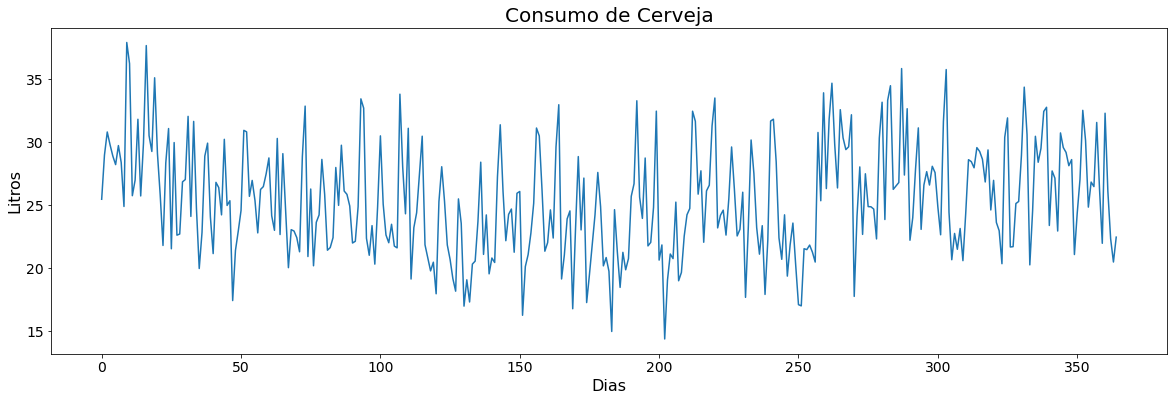

In [ ]:
## Plotando a variável *dependente* (y) https://pandas.pydata.org/pandas-docs/stable/visualization.html
fig, ax = plt.subplots(figsize=(20, 6))#cria uma figura e coloca vários graficos dentro

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)

In [ ]:
import seaborn as sns #https://seaborn.pydata.org/

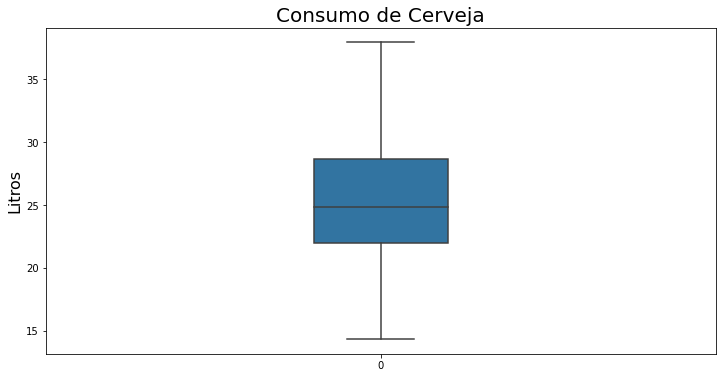

In [ ]:
## Box plot da variável *dependente* (y) 
ax = sns.boxplot(data=dados['consumo'], orient='v', width=0.2)### Box plot da variável *dependente* (y)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax

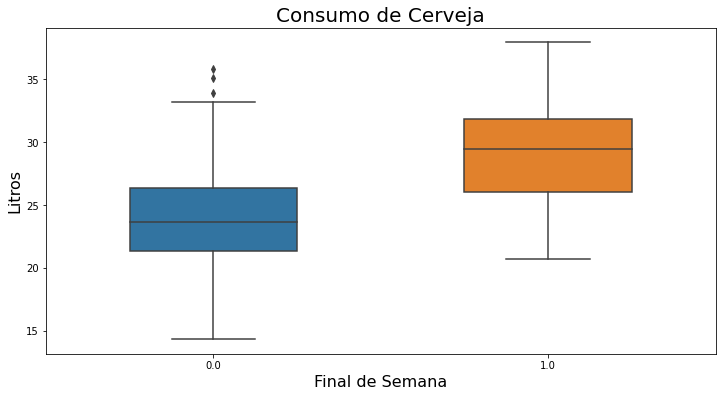

In [ ]:
#Box Plot com Duas Variáveis
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.5) 
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax#o consumo aparentemente tende a aumentar no fim de semana

In [ ]:
#Configurações de estilo e cor da biblioteca seaborn
#Controle de estilo
#API
#https://seaborn.pydata.org/api.html#style-api

#Tutorial
#https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial


#Paleta de cores
#API
#https://seaborn.pydata.org/api.html#palette-api

#Tutorial
#https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

#palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

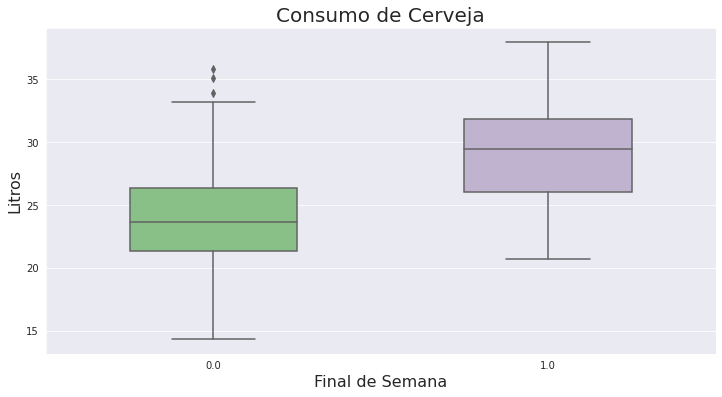

In [ ]:
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

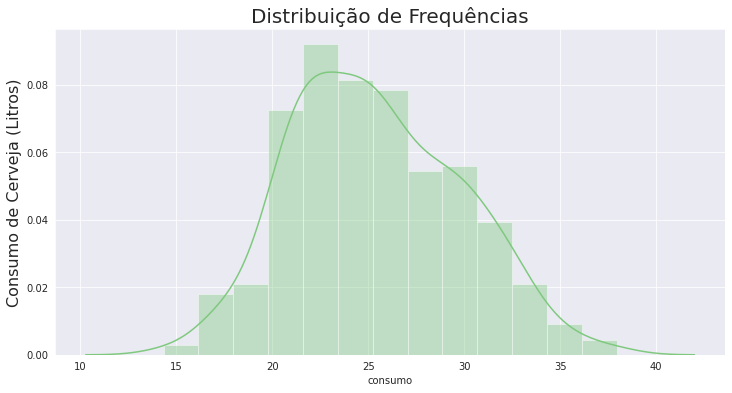

In [ ]:
#Distribuição de frequências da variável *dependente* (y) # https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot
ax = sns.distplot(dados['consumo']) #vamos verificar se possui uma dist normal
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja (Litros)', fontsize=16)
ax # tá quase parecendo uma normal

# Variável dependente vs Variável explicativa (Aula 3) Graficos

Gráficos de dispersão entre as variáveis do dataset

seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

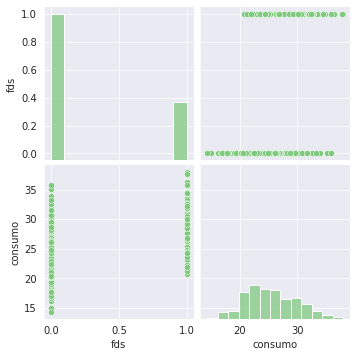

In [ ]:
ax = sns.pairplot(dados)

## Plotando o pairplot fixando somente uma variável no eixo y

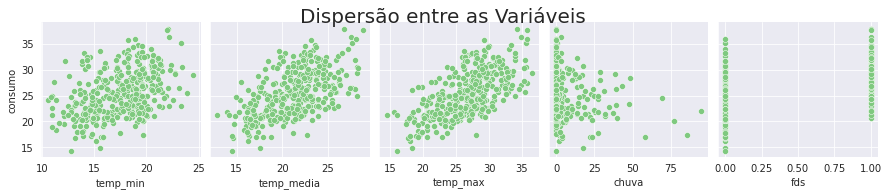

In [ ]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

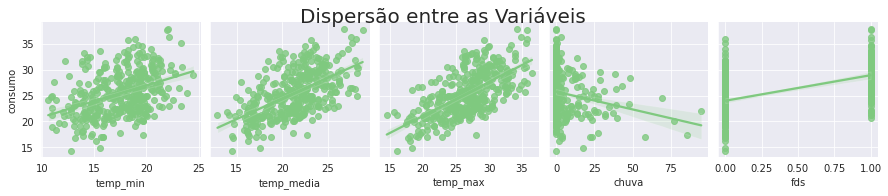

In [ ]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg')#com a reta de regressao
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

 <font color='red' style='font-size: 30px;'>3.2 Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

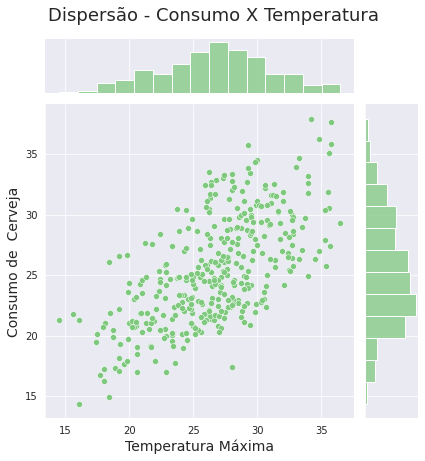

In [ ]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de  Cerveja", fontsize=14)
ax

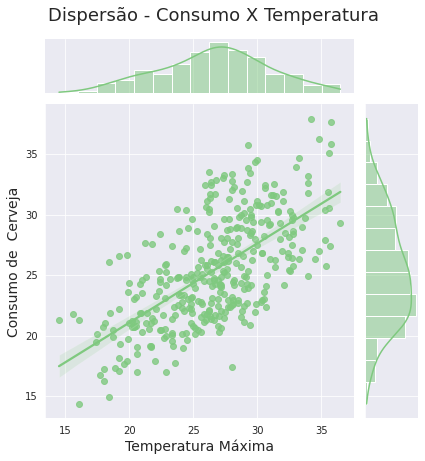

In [ ]:
## Plotando um jointplot com a reta de regressão estimada
ax = sns.jointplot(x="temp_max", y="consumo", data=dados, kind='reg')
ax.fig.suptitle('Dispersão - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de  Cerveja", fontsize=14)
ax

<font color='red' style='font-size: 30px;'>3.3 Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

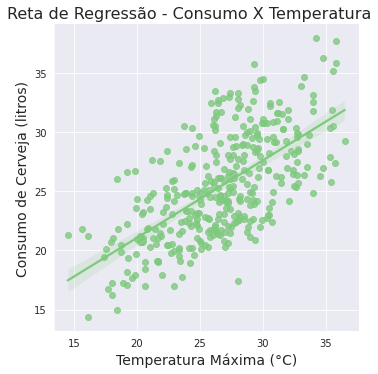

In [ ]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

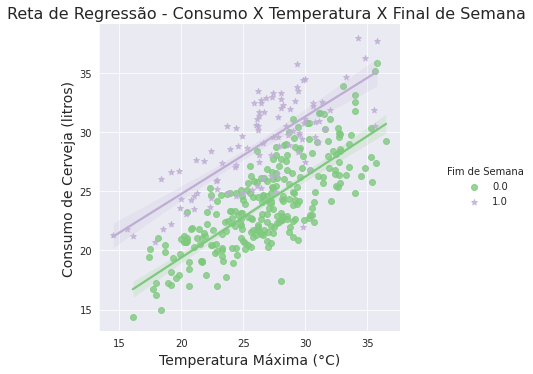

In [ ]:
## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)
ax = sns.lmplot(x="temp_max", y="consumo", data=dados, hue="fds", markers=['o', '*'], legend=False)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura X Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title="Fim de Semana")
ax

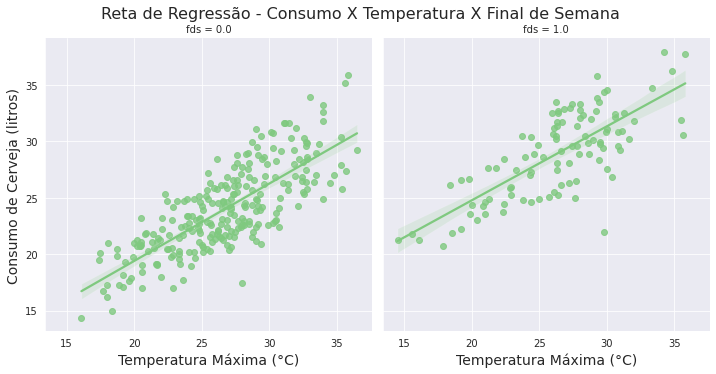

In [ ]:
## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)
ax = sns.lmplot(x="temp_max", y="consumo", data=dados, col="fds")
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura X Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>4.2 Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

In [ ]:
from sklearn.model_selection import train_test_split #aqui é aprendizado supervisionado (Temos os valores reais de y)
## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*
from sklearn.linear_model import LinearRegression #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn import metrics #https://scikit-learn.org/stable/modules/classes.html#regression-metrics

y = dados['consumo']# Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)
X = dados[['temp_max', 'chuva', 'fds']]# Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)# Criando os datasets de treino e de teste

modelo = LinearRegression() ## Instanciando a classe *LinearRegression()*
modelo.fit(X_train, y_train) ## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [ ]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2))) # Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

R² = 0.73


In [ ]:
y_previsto = modelo.predict(X_test) # Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

In [ ]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2)) ## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

R² = 0.69


Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



### <font color='red' style='font-size: 30px;'>4.3 Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

In [ ]:
entrada = X_test[0:1] #vamos fazer um modelo só pra esse "ponto"
entrada

In [ ]:
modelo.predict(entrada)[0] #o consumo médio vai ser de 26094

Criando um simulador simples

In [ ]:
temp_max=40#criando um x hipotético só para simular
chuva=0
fds=1
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))# a previsão é de 38742

### <font color='red' style='font-size: 30px;'>4.4 Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

Obtendo o intercepto do modelo

Yi = B1 +B1X2i +B2X3i +B3X4i + ui
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [ ]:
modelo.intercept_ # B1

In [ ]:
type(modelo.intercept_)

Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [ ]:
modelo.coef_#Conseguindo os B2,b3,b4

In [ ]:
type(modelo.coef_)

In [ ]:
X.columns ## Confirmando a ordem das variáveis explicativas no DataFrame #x2,x3,x4

In [ ]:
index=['Intercepto', 'Temperatura Máxima', 'Chuva (mm)', 'Final de Semana'] ## Criando uma lista com os nomes das variáveis do modelo

In [ ]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros']) ## Criando um DataFrame para armazenar os coeficientes do modelo

Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

## <font color='red' style='font-size: 30px;'>4.5 Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

In [ ]:
y_previsto_train = modelo.predict(X_train) ## Gerando as previsões do modelo para os dados de TREINO

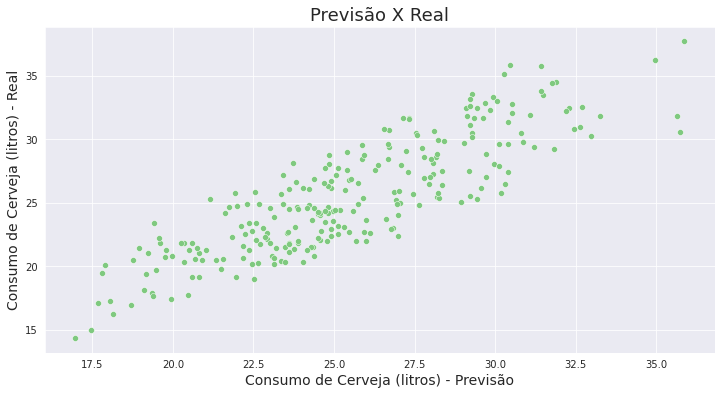

In [ ]:
## Gráfico de dispersão entre valor estimado e valor real
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

In [ ]:
residuo = y_train - y_previsto_train ## Obtendo os resíduos

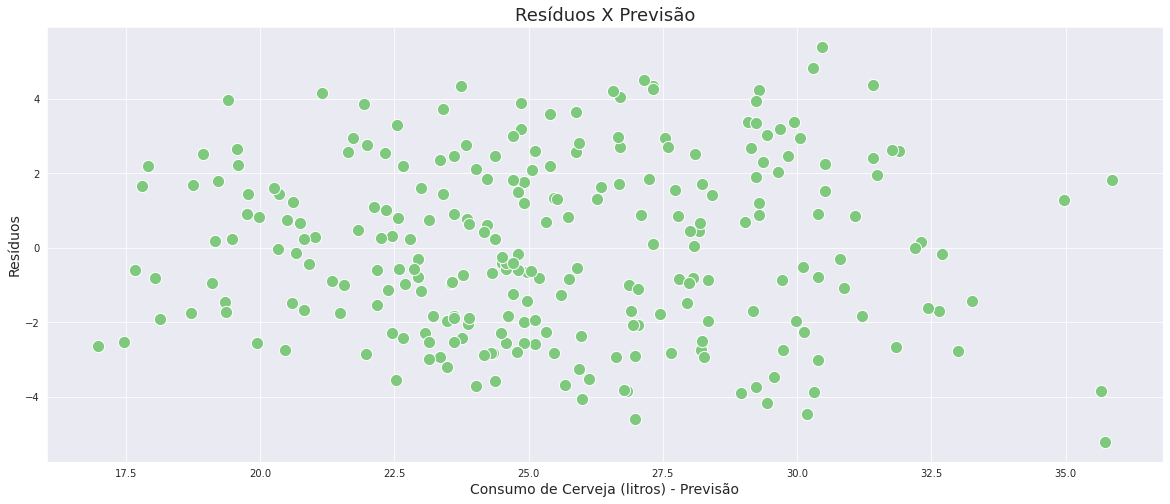

In [ ]:
## Gráfico de dispersão entre valor estimado e resíduos
#Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

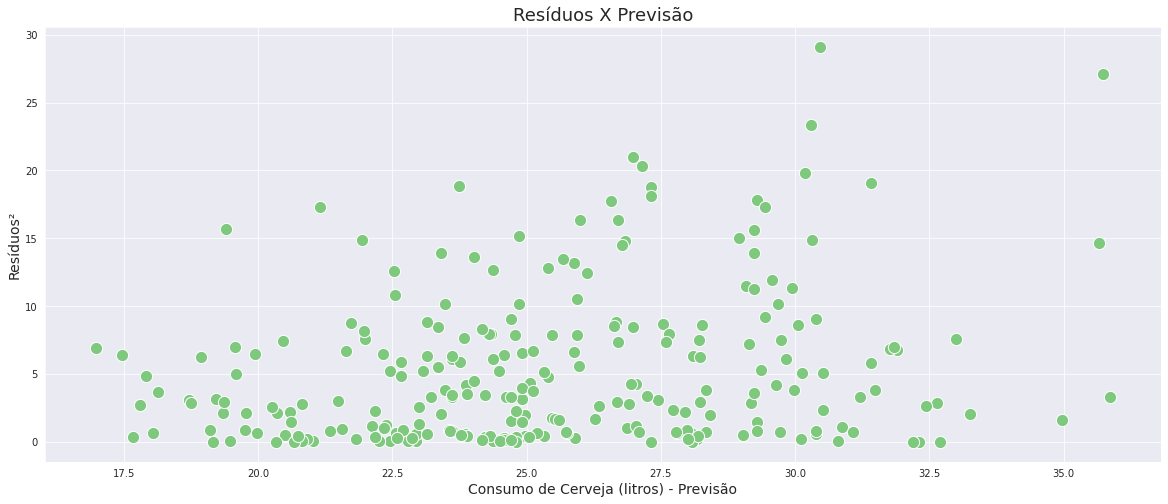

In [ ]:
## Utilizando os resíduos ao quadrado
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)#fazendo um grafico do r²
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax #parece que a variancia dos registros não é constante

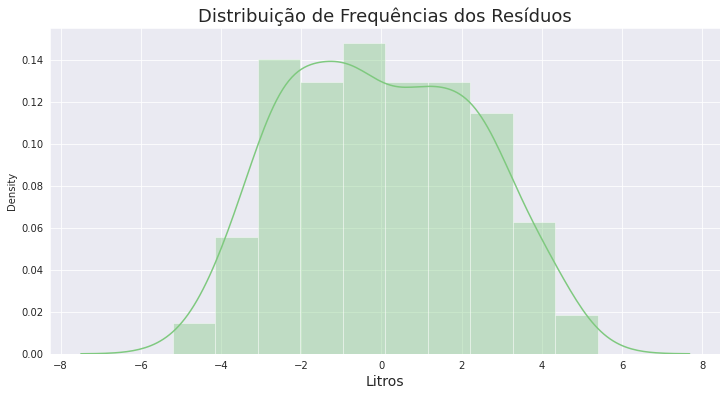

In [ ]:
## Plotando a distribuição de frequências dos resíduos
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>5 Comparando Modelos</font>
<hr style='border: 2px solid red;'>

In [ ]:
X2 = dados[['temp_media', 'chuva', 'fds']]## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)## Criando os datasets de treino e de teste
modelo_2 = LinearRegression()## Instanciando a classe *LinearRegression()*
modelo_2.fit(X2_train, y2_train)## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [ ]:
print('Modelo com Temp. Média')## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior
print('R² = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

In [ ]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2))) # É maior do que o do modelo 2

Modelo com Temp. Máxima
R² = 0.73


In [ ]:
## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

In [ ]:
## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos
print('Modelo com Temp. Média')
print('R² = {}'.format(metrics.r2_score(y2_test, y_previsto_2).round(2)))#menor do que o modelo 1

Modelo com Temp. Média
R² = 0.66


In [ ]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))#maior do que o modelo 2

Modelo com Temp. Máxima
R² = 0.69


## <font color='red' style='font-size: 30px;'>5.2 Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



In [ ]:
## Obtendo métricas para o modelo com Temperatura Média
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)#quanto menor o erro, melhor
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])#criando o dataframe pra ficar bonitinho

,Métricas
EQM,6.06
REQM,2.46
R²,0.66


In [ ]:
## Obtendo métricas para o modelo com Temperatura Máxima
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas']) #o r² é maior, isso é melhor. O erro é menor, oq faz com que também seja melhor.
#Então o modelo de baixo é melhor, explica melhor a variação de consumo da cerveja

,Métricas
EQM,5.47
REQM,2.34
R²,0.69


# <font color='red' style='font-size: 30px;'>6 Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [ ]:
import picke

In [ ]:
output = open('modelo_consumo_cerveja', 'wb')#salva o modelo
pickle.dump(modelo, output)
output.close

### Em um novo notebook/projeto Python(Esse script vai importar um notebook novo)

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```

In [ ]:
#ele roda o modele feito em outro notebook aqui neste notebook